In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [6]:
ticker = '^NSEI'
df = yf.download(ticker, period="1d", interval="15m")


[*********************100%%**********************]  1 of 1 completed


In [7]:
data = df[['Open', 'High', 'Low', 'Close', 'Volume']].values


In [8]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
sequence_length = 10  # Adjust as needed
X, y = [], []

In [10]:
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(1 if data[i+sequence_length][3] > data[i+sequence_length-1][3] else 0)


In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 5)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=64)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7265 - accuracy: 0.5833
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 0.7086 - accuracy: 0.5833
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6944 - accuracy: 0.5833
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6834 - accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6760 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6705 - accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6659 - accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6618 - accuracy: 0.5833
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6579 - accuracy: 0.5833
Epoch 10/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6534 - accuracy: 0.6667


In [16]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy*100:.2f}%")

1/1 [==============================] - 0s 374ms/step - loss: 0.6738 - accuracy: 0.3333
Accuracy: 33.33%


In [17]:
import matplotlib.pyplot as plt


In [18]:
y_test_pred = model.predict(X_test)


1/1 [==============================] - 1s 519ms/step


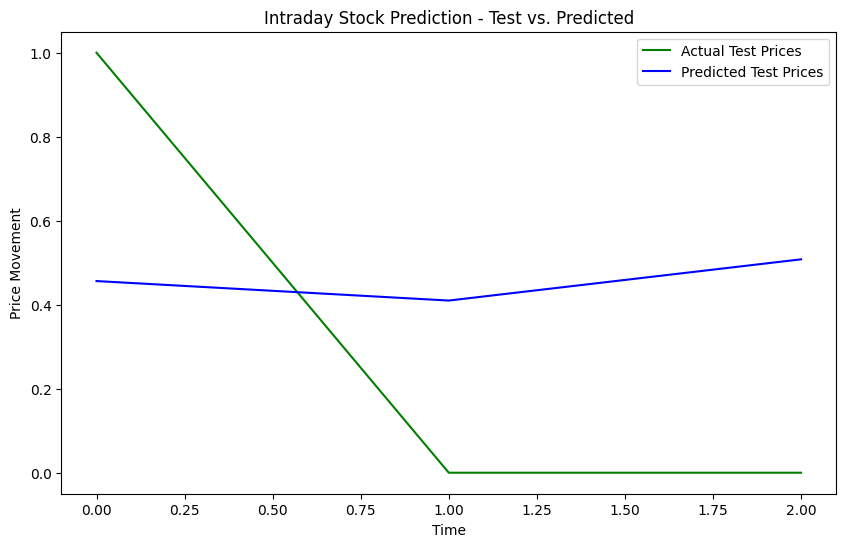

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Test Prices', color='green')
plt.plot(y_test_pred, label='Predicted Test Prices', color='blue')
plt.xlabel('Time')
plt.ylabel('Price Movement')
plt.title('Intraday Stock Prediction - Test vs. Predicted')
plt.legend()
plt.show()